In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [30]:
train_data = pd.read_csv("train.csv")
x_train = train_data[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'HalfBath']].values
y_train = train_data['SalePrice'].values
test_data = pd.read_csv("test.csv")
x_test = test_data[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'HalfBath']].values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


x_train_denorm = copy.deepcopy(x_train)
y_train_denorm= copy.deepcopy(y_train)
x_test_denorm = copy.deepcopy(x_test)
x_train,y_train, x_test,std_y,mean_y = mean_normalize_train_test(x_train,y_train,x_test)


In [31]:
def mean_normalize_train_test(x_train,y_train, x_test):

    mean_values = np.mean(x_train, axis=0)
    std_values = np.std(x_train, axis=0)

    mean_testvalues = np.mean(x_test, axis=0)
    std_testvalues = np.std(x_test, axis=0)

    x_train_normalized = (x_train - mean_values) / std_values

    x_test_normalized = (x_test - mean_testvalues) / std_testvalues

    mean_y = np.mean(y_train)
    std_y = np.std(y_train)
    y_train_normalized = (y_train - mean_y) / std_y

    return x_train_normalized,y_train_normalized, x_test_normalized, std_y,mean_y

In [8]:
def compute_cost(X, y, w, b):
    m = X.shape[0]

    predictions = X.dot(w) + b

    squared_errors = (predictions - y) ** 2

    total_cost = np.sum(squared_errors) / (2 * m)

    return total_cost

In [9]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]

    predictions = X.dot(w) + b

    differences = predictions - y

    dj_dw = dj_dw = (X.T.dot(differences))/m
    dj_db = np.sum(differences) / m

    return dj_dw, dj_db

In [10]:
import math

In [11]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    m, n = X.shape

    J_history = []

    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost =  cost_function(X, y, w, b)
            J_history.append(cost)


        if i % math.ceil(num_iters / 10) == 0:

            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b

In [32]:
initial_w = np.zeros(7)
initial_b = 0.

iterations = 2000
alpha = 0.001


w, b = gradient_descent(x_train, y_train, initial_w, initial_b,
                               compute_cost, compute_gradient, alpha, iterations)
print("w, b found by gradient descent:", w, b)

Iteration    0: Cost     0.50   
Iteration  200: Cost     0.29   
Iteration  400: Cost     0.22   
Iteration  600: Cost     0.19   
Iteration  800: Cost     0.18   
Iteration 1000: Cost     0.18   
Iteration 1200: Cost     0.17   
Iteration 1400: Cost     0.17   
Iteration 1600: Cost     0.17   
Iteration 1800: Cost     0.17   
w, b found by gradient descent: [ 0.25119792  0.22260766  0.1146211   0.26817656 -0.11193866  0.19799822
  0.13397007] 6.060053524441592e-17


In [33]:
y_predictions = x_train.dot(w) + b
y_predictions_denorm = (y_predictions * std_y) + mean_y

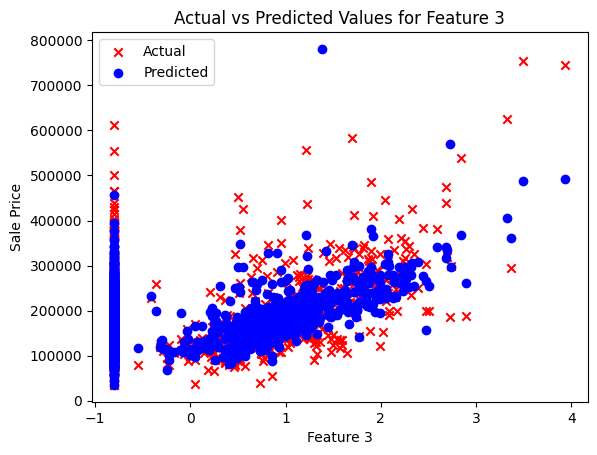

In [34]:
feature_index = 2

# Scatter plot for the chosen feature
plt.scatter(x_train[:, feature_index], y_train_denorm, label='Actual', color='r', marker='x')
plt.scatter(x_train[:, feature_index], y_predictions_denorm, label='Predicted', color='b')

plt.xlabel(f'Feature {feature_index + 1}')
plt.ylabel('Sale Price')
plt.title(f'Actual vs Predicted Values for Feature {feature_index + 1}')
plt.legend()
plt.show()


In [35]:
y_test_predictions = ((x_test.dot(w) + b) * std_y) + mean_y
print(y_test_predictions)

[115131.45575078 184109.21372888 202840.07565257 ... 138202.83630284
 112186.17355879 230939.40158837]


In [36]:
test_ids = pd.DataFrame({'Id': range(1, len(y_test_predictions) + 1)})

results_df = pd.DataFrame({'Id': test_ids['Id'], 'SalePrice': y_test_predictions})

results_df.to_csv('predictions.csv', index=False)
